In [2]:
# Setup
import pandas as pd
import numpy as np

In [3]:
#setup to download data directly from the databank
import pandas_datareader
import datetime

In [4]:
#setup to download data directly from world data bank
from pandas_datareader import wb

In [5]:
#define countries we are looking for
countries = ["CN","JP","BR","US","DK","ES","TM","IN","NG"]

In [6]:
#define indicator
indicators = {"NY.GDP.PCAP.KD":"GDP per capita", "NY.GDP.MKTP.CD":"GDP(current US $)", "SP.POP.TOTL":"Population total", 
              "SP.URB.TOTL.IN.ZS":"Urban Population in %", "SP.DYN.TFRT.IN":"Fertility Rate", "SE.ADT.LITR.ZS": "Literacy rate, adult total in %" }

In [8]:
#example download world data bank shown in the lecture
data_wb = wb.download(indicator= indicators, country= countries, start=1990, end=2017)
data_wb = data_wb.rename(columns = {"NY.GDP.PCAP.KD":"gdp_pC","NY.GDP.MKTP.CD":"gdp", "SP.POP.TOTL":"pop", "SP.URB.TOTL.IN.ZS":"urban_pop%", 
                                    "SP.DYN.TFRT.IN":"frt", "SE.ADT.LITR.ZS":"litr"})
data_wb = data_wb.reset_index()
data_wb.head(5)

,country,year,gdp_pC,gdp,pop,urban_pop%,frt,litr
0,Brazil,2017,10888.982385,2.055506e+12,209288278,86.309,NaN,NaN
1,Brazil,2016,10868.653444,1.793989e+12,207652865,86.042,1.726,NaN
2,Brazil,2015,11351.565748,1.802214e+12,205962108,85.770,1.740,92.04790
3,Brazil,2014,11870.148408,2.455994e+12,204213133,85.492,1.753,91.72943
4,Brazil,2013,11915.417054,2.472807e+12,202408632,85.209,1.765,91.48424


IMPORTANT: Change the following code to your's and if you run it twice you need to change the name or we figure sth out on how to overwrite the existing one

In [8]:
# save datasheet as excel (just to see it)_index=false to avoid saving the index
writer = pd.ExcelWriter('pandas_simple.xlsx', engine='xlsxwriter')
#data_wb.to_excel(r"C:\Users\BKirs\OneDrive\03_Master\07_IntroToProgramming\DataProject_IP\projects-2019-tba\dataproject\dataproject\Dataproject_Bianca\data_wb1.xlsx")

#Bianca: simply in the same folder
data_wb.to_excel(r"./data_wb1.xlsx")

In [9]:
#Tonje 
data_wb.dtypes

country        object
year           object
gdp_pC        float64
gdp           float64
pop             int64
urban_pop%    float64
frt           float64
litr          float64
dtype: object

IMPORTANT: Find a way to combine the 2 decimals and the format of floats

In [10]:
# Bianca
#make the data pretty:
pd.options.display.float_format = '{:,}'.format
pd.set_option("precision", 2)
# other way: pd.set_option('display.float_format', lambda x: '%.2f' % x)

data_wb.head(5)

#round(data_wb.head(),2)

,country,year,gdp_pC,gdp,pop,urban_pop%,frt,litr
0,Brazil,2017,"10,888.9823851831","2,055,505,502,224.73",209288278,86.309,nan,nan
1,Brazil,2016,"10,868.6534435352","1,793,989,048,409.29",207652865,86.042,1.726,nan
2,Brazil,2015,"11,351.5657481703","1,802,214,373,741.32",205962108,85.77,1.74,92.0479
3,Brazil,2014,"11,870.1484076345","2,455,993,625,159.37",204213133,85.492,1.753,91.7294299999999
4,Brazil,2013,"11,915.4170541095","2,472,806,919,901.67",202408632,85.209,1.765,91.48424


In [11]:
# Bianca
#new variable for gdp
data_wb['gdp_in_bil'] = data_wb['gdp']/1000000000
data_wb['gdp_in_millions'] = data_wb['gdp']/1000000
#other way to round:
#    data_wb['gdp_in_millions'] = round(data_wb['gdp']/1000000,2)

round(data_wb.head(),2) #just to check

,country,year,gdp_pC,gdp,pop,urban_pop%,frt,litr,gdp_in_bil,gdp_in_millions
0,Brazil,2017,"10,888.98","2,055,505,502,224.73",209288278,86.31,nan,nan,"2,055.51","2,055,505.5"
1,Brazil,2016,"10,868.65","1,793,989,048,409.29",207652865,86.04,1.73,nan,"1,793.99","1,793,989.05"
2,Brazil,2015,"11,351.57","1,802,214,373,741.32",205962108,85.77,1.74,92.05,"1,802.21","1,802,214.37"
3,Brazil,2014,"11,870.15","2,455,993,625,159.37",204213133,85.49,1.75,91.73,"2,455.99","2,455,993.63"
4,Brazil,2013,"11,915.42","2,472,806,919,901.67",202408632,85.21,1.76,91.48,"2,472.81","2,472,806.92"


In [12]:
# Bianca
#drop old variable for gdp
del data_wb['gdp']
round(data_wb.head(),2)

#drop old GDP
#data_wb.drop(['gdp'], axis = 1, inplace = True)

#check that its droped 
#data_wb.head(5)

#new interpretation of GDP: GDP (current $US), measured in 100 millions -> change description

,country,year,gdp_pC,pop,urban_pop%,frt,litr,gdp_in_bil,gdp_in_millions
0,Brazil,2017,"10,888.98",209288278,86.31,nan,nan,"2,055.51","2,055,505.5"
1,Brazil,2016,"10,868.65",207652865,86.04,1.73,nan,"1,793.99","1,793,989.05"
2,Brazil,2015,"11,351.57",205962108,85.77,1.74,92.05,"1,802.21","1,802,214.37"
3,Brazil,2014,"11,870.15",204213133,85.49,1.75,91.73,"2,455.99","2,455,993.63"
4,Brazil,2013,"11,915.42",202408632,85.21,1.76,91.48,"2,472.81","2,472,806.92"


In [13]:
data_wb.shape #how many obs and variables

(252, 9)

In [14]:
#summary statistics
data_wb.describe()

,gdp_pC,pop,urban_pop%,frt,litr,gdp_in_bil,gdp_in_millions
count,252.0,252.0,252.0,243.0,37.0,252.0,252.0
mean,"21,233.39634238703","353,535,362.6825397",62.67078174603172,2.500788065843621,86.99691945945946,"2,711.9587098137304","2,711,958.7098137317"
std,"20,848.112381275565","464,366,860.29945743",22.30939273104207,1.429511972921093,15.3933906871932,"4,160.880644975223","4,160,880.6449752236"
min,530.894738000648,"3,683,966.0",25.547,1.13,48.22207,2.37875997544506,"2,378.75997544506"
25%,"2,131.2548240995525","40,015,504.75",42.5715,1.5470000000000002,88.61624,275.6118545847615,"275,611.8545847615"
50%,"9,117.394508632831","133,683,074.5",76.0985,1.926,91.48424,684.5027534737676,"684,502.7534737675"
75%,"42,252.611495064804","309,914,885.75",81.5765,2.8605,97.75069,"3,939.73453781613","3,939,734.5378161296"
max,"61,582.166068968","1,386,395,000.0",91.535,6.49,99.7,"19,390.604","19,390,604.0"


In [15]:
# detect for missing data
## count missing data
data_wb.isnull().sum().sum()

224

In [16]:
## number of observations
data_wb.count()

country            252
year               252
gdp_pC             252
pop                252
urban_pop%         252
frt                243
litr                37
gdp_in_bil         252
gdp_in_millions    252
dtype: int64

In [17]:
## missing value of each variable
data_wb.isnull().sum()

country              0
year                 0
gdp_pC               0
pop                  0
urban_pop%           0
frt                  9
litr               215
gdp_in_bil           0
gdp_in_millions      0
dtype: int64

In [18]:
# drop litr OR DELETE? AS BF?
data_wb.drop(['litr'], axis = 1, inplace = True)

In [19]:
#search for the nine missing values in frt
data_wb.groupby('year').mean()

,gdp_pC,pop,urban_pop%,frt,gdp_in_bil,gdp_in_millions
year,,,,,,
1990,"17,322.45185489642","296,754,760.0",57.05544444444445,2.976555555555555,"1,220.2763922451793","1,220,276.3922451795"
1991,"17,480.059862266076","301,483,292.6666667",57.391,2.9156111111111107,"1,308.7053863987721","1,308,705.386398772"
1992,"17,614.304533926268","306,083,205.0",57.71377777777778,2.8597777777777775,"1,377.0111991352699","1,377,011.1991352697"
1993,"17,609.77337467314","310,600,879.4444444",58.03633333333333,2.7882777777777776,"1,465.414697145402","1,465,414.697145402"
1994,"18,033.666255943648","315,117,504.6666667",58.359222222222215,2.734611111111111,"1,598.0838210612492","1,598,083.821061249"
1995,"18,406.356585672118","319,614,237.2222222",58.698333333333345,2.667777777777778,"1,757.4432555540452","1,757,443.2555540449"
1996,"18,865.593012154946","324,075,633.0",59.05588888888888,2.614,"1,768.647553147797","1,768,647.553147797"
1997,"19,293.235726557745","328,551,075.6666667",59.41988888888889,2.5695555555555556,"1,788.6121711759208","1,788,612.1711759209"
1998,"19,603.763245310573","332,962,293.0",59.784555555555556,2.5311111111111106,"1,809.0465411420353","1,809,046.5411420357"


In [20]:
#show frt only for 2017
data_wb.loc[data_wb['year'] == "2017", :].head(-1)

,country,year,gdp_pC,pop,urban_pop%,frt,gdp_in_bil,gdp_in_millions
0,Brazil,2017,"10,888.9823851831",209288278,86.309,nan,"2,055.50550222473","2,055,505.50222473"
28,China,2017,"7,329.08929913216",1386395000,57.96,nan,"12,237.700479375","12,237,700.479375"
56,Denmark,2017,"61,582.166068968",5769603,87.757,nan,324.871968807469,"324,871.968807469"
84,Spain,2017,"32,405.7508143881",46572028,80.08,nan,"1,311.32001551599","1,311,320.01551599"
112,India,2017,"1,964.59518318563",1339180127,33.6,nan,"2,600.81824355965","2,600,818.2435596497"
140,Japan,2017,"48,556.9272446078",126785797,91.535,nan,"4,872.13694550759","4,872,136.94550759"
168,Nigeria,2017,"2,412.20283480133",190886311,49.519,nan,375.745486520656,"375,745.486520656"
196,Turkmenistan,2017,"7,317.54950612294",5758075,51.153,nan,37.9262857142857,"37,926.285714285696"


In [21]:
# drop the year for which the data is missing 
I = data_wb['year'] == "2017"
data_wb.drop(data_wb[I].index, inplace = True)
# => data cleaning done

In [22]:
#summary statistics
data_wb.describe()

,gdp_pC,pop,urban_pop%,frt,gdp_in_bil,gdp_in_millions
count,243.0,243.0,243.0,243.0,243.0,243.0
mean,"21,091.48179113258","351,664,843.61728394",62.44060082304523,2.500788065843621,"2,634.596567678332","2,634,596.567678333"
std,"20,765.76027926693","461,984,890.14733166",22.364281465961735,1.429511972921093,"4,039.983839633184","4,039,983.839633183"
min,530.894738000648,"3,683,966.0",25.547,1.13,2.37875997544506,"2,378.75997544506"
25%,"2,068.4600920008497","39,973,620.5",42.111999999999995,1.5470000000000002,271.0363222625155,"271,036.3222625155"
50%,"8,924.89696137144","131,972,533.0",76.097,1.926,655.420645476906,"655,420.645476906"
75%,"42,214.99489958621","308,054,975.0",81.391,2.8605,"3,746.61477028235","3,746,614.7702823495"
max,"61,174.5451464235","1,378,665,000.0",91.457,6.49,"18,624.475","18,624,475.0"


In [23]:
data_wb.shape

(243, 8)

In [24]:
data_wb.count()
#=>data cleaning finished

country            243
year               243
gdp_pC             243
pop                243
urban_pop%         243
frt                243
gdp_in_bil         243
gdp_in_millions    243
dtype: int64

In [25]:
# make some cool groupby things see lecture basic_data
##empl.groupby('municipality')['e'].mean().head(10)
##empl.groupby('year')['e'].mean().plot
# demean to compare it better
##stocks2.groupby('firm')['close_demeaned'].plot(legend=True); 
##plt.title('Stock price: deviation from time-average'); 
# perform summary statistics
## nameofdataset.describe()
# maybe create an interactive table for each country
##see load_save_and_structure_data
#correlation table?
# maybe perform a simple regression
# world maps as diagramm

Fertility rate//
Group B//
Change the number

In [26]:
#Marie: groupby country
round(data_wb.groupby('country').mean(),2)

##overview shows countries with a high gdp per capita have a low fertility rate. countries with a high gdp per capita have a huge 
##share of urban population

,gdp_pC,pop,urban_pop%,frt,gdp_in_bil,gdp_in_millions
country,,,,,,
Brazil,"9,595.04","180,812,509.93",81.31,2.18,"1,183.42","1,183,415.63"
China,"2,945.46","1,276,308,703.7",40.55,1.65,"3,606.57","3,606,573.56"
Denmark,"54,864.22","5,401,958.63",85.86,1.76,238.79,"238,786.51"
India,994.89,"1,104,088,507.19",28.89,3.11,935.46,"935,458.79"
Japan,"42,941.81","126,685,574.48",83.94,1.4,"4,715.85","4,715,846.81"
Nigeria,"1,820.09","135,188,798.89",38.11,6.03,203.29,"203,289.55"
Spain,"28,067.42","42,809,614.85",77.17,1.28,972.34,"972,343.34"
Turkmenistan,"3,568.09","4,675,784.89",46.95,3.1,13.47,"13,465.1"
United States,"45,026.29","289,012,140.0",79.19,1.99,"11,842.19","11,842,189.81"


In [27]:
#Tonje 
import matplotlib.pyplot as plt
%matplotlib inline 
from ipywidgets import interact, interactive, fixed, interact_manual 
import ipywidgets as widgets 


In [28]:
#Marie
#index find out
data_wb.index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            242, 243, 244, 245, 246, 247, 248, 249, 250, 251],
           dtype='int64', length=243)

In [29]:
#Tonje 
country=data_wb["country"]
year=data_wb["year"]
gdp_pC=data_wb["gdp_pC"]


In [30]:
#Tonje 
def interactive_figure(country, data_wb):
    """define an interactive figure that uses countries and the dataframe as inputs """
    
    data_country = data_wb[data_wb.country == country]
    year = data_country.year
    gdp_pC = data_country.gdp_pC
    fig = plt.figure(dpi=100)
    ax = fig.add_subplot(1,1,1)
    ax.plot(year, gdp_pC)
    ax.set_xlabel("Years")
    ax.set_ylabel("GDP per Capita")
    plt.xticks(rotation=90)
    plt.gca().invert_xaxis()



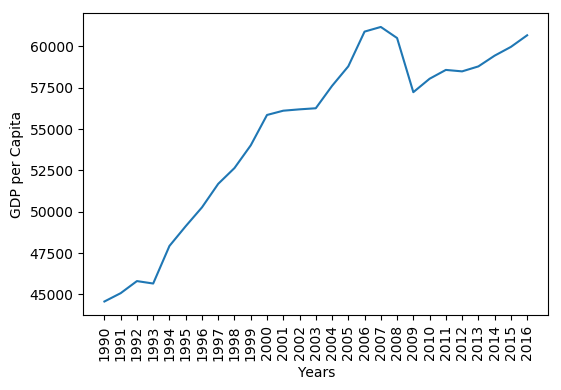

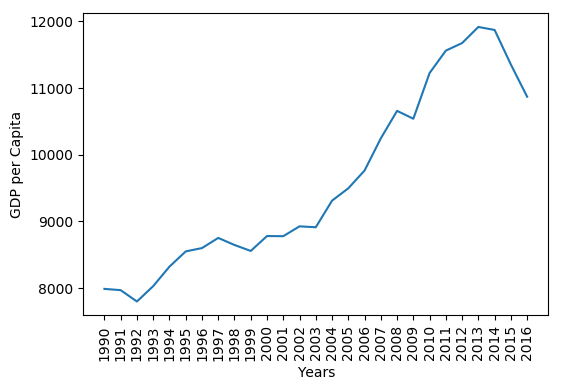

In [31]:
#Tonje
#Just to check that it works for different inputs 
interactive_figure('Denmark',data_wb)
interactive_figure('Brazil',data_wb)



In [32]:
#Tonje
widgets.interact(interactive_figure,
    year = widgets.fixed(year),
    data_wb = widgets.fixed(data_wb),
    country=widgets.Dropdown(description="Country", options=data_wb.country.unique()),
    gdp_pC=widgets.fixed(gdp_pC)
);

interactive(children=(Dropdown(description='Country', options=('Brazil', 'China', 'Denmark', 'Spain', 'India',…

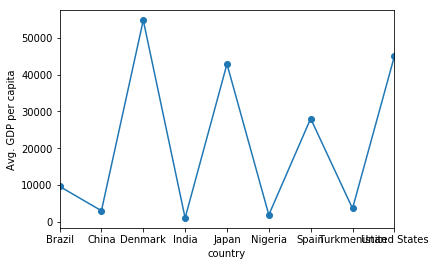

In [33]:
#Tonje: TRY
#Average GDP per capita?
ax = data_wb.groupby("country")['gdp_pC'].mean().plot(kind='line', style='-o'); 
ax.set_ylabel('Avg. GDP per capita'); 

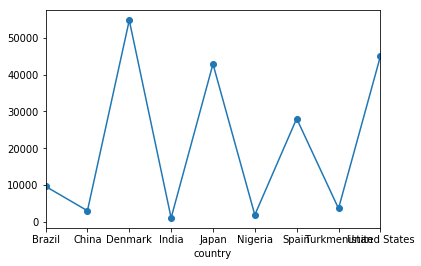

In [34]:
#Tonje: TRY
X=data_wb.country
Y=data_wb.groupby("country")['gdp_pC'].mean().plot(kind='line', style='-o'); 

Text(0, 0.5, 'Avg. annual fertility rate')

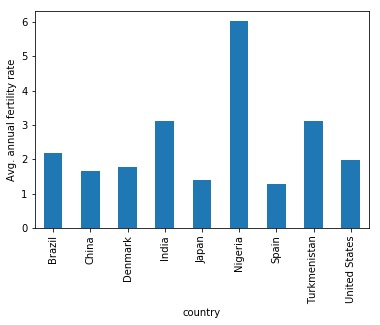

In [35]:
#reinnehmen Marie
ax = data_wb.groupby('country').frt.mean().plot(kind='bar')
ax.set_ylabel('Avg. annual fertility rate')

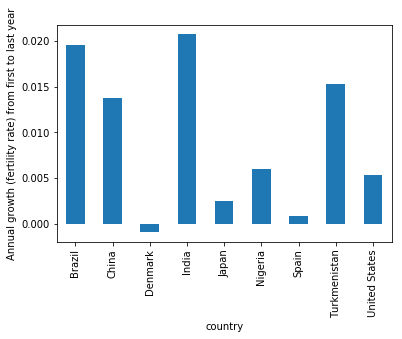

In [36]:
#reinnehmen Marie
def annual_growth(x): 
    x_last    = x.values[-1]
    x_first   = x.values[0]
    num_years = len(x)
    
    growth_annualized = (x_last/x_first)**(1/num_years) - 1.0
    return growth_annualized

ax = data_wb.groupby('country')['frt'].agg(annual_growth).plot(kind='bar')
ax.set_ylabel('Annual growth (fertility rate) from first to last year'); 

In [37]:
# Bianca
# try folium circle
# Python God: https://www.kaggle.com/rachan/how-to-folium-for-maps-heatmaps-time-analysis
#https://blog.prototypr.io/interactive-maps-with-python-part-1-aa1563dbe5a9

import folium

In [38]:
#Bianca
data_wb.groupby('country').mean()

,gdp_pC,pop,urban_pop%,frt,gdp_in_bil,gdp_in_millions
country,,,,,,
Brazil,"9,595.044474040149","180,812,509.92592594",81.30911111111111,2.179925925925926,"1,183.4156320703592","1,183,415.6320703593"
China,"2,945.4643286685964","1,276,308,703.7037036",40.55207407407407,1.6533703703703704,"3,606.573560972753","3,606,573.560972753"
Denmark,"54,864.22462146124","5,401,958.62962963",85.86040740740742,1.7607407407407407,238.78650975806516,"238,786.5097580652"
India,994.891572655445,"1,104,088,507.1851852",28.891740740740747,3.113185185185185,935.4587895314128,"935,458.7895314127"
Japan,"42,941.81097519505","126,685,574.48148148",83.9354074074074,1.3951851851851853,"4,715.8468104487365","4,715,846.810448736"
Nigeria,"1,820.0941732234444","135,188,798.8888889",38.11422222222223,6.028370370370372,203.28955441223545,"203,289.55441223548"
Spain,"28,067.420728963334","42,809,614.85185185",77.1717037037037,1.2848148148148146,972.3433364964282,"972,343.3364964281"
Turkmenistan,"3,568.0943748309674","4,675,784.888888889",46.94514814814815,3.099777777777777,13.465100600194567,"13,465.100600194568"
United States,"45,026.29087115506","289,012,140.0",79.18559259259261,1.9917222222222226,"11,842.189814814818","11,842,189.814814815"


In [39]:
#Bianca
row_indexes=data_wb[data_wb['country']== 'Brazil'].index
data_wb.loc[row_indexes,'Lat']= -14.2350
data_wb.loc[row_indexes,'Lon']= -51.9253

row_indexes=data_wb[data_wb['country']== 'China'].index
data_wb.loc[row_indexes,'Lat']= 33.5449
data_wb.loc[row_indexes,'Lon']= 103.149

row_indexes=data_wb[data_wb['country']== 'Denmark'].index
data_wb.loc[row_indexes,'Lat']= 56.2639
data_wb.loc[row_indexes,'Lon']= 9.5018

row_indexes=data_wb[data_wb['country']== 'Spain'].index
data_wb.loc[row_indexes,'Lat']= 40.4637
data_wb.loc[row_indexes,'Lon']= -3.7492

row_indexes=data_wb[data_wb['country']== 'India'].index
data_wb.loc[row_indexes,'Lat']= 20.5937
data_wb.loc[row_indexes,'Lon']= 78.9629

row_indexes=data_wb[data_wb['country']== 'Japan'].index
data_wb.loc[row_indexes,'Lat']= 36.2048
data_wb.loc[row_indexes,'Lon']= 138.2529

row_indexes=data_wb[data_wb['country']== 'Nigeria'].index
data_wb.loc[row_indexes,'Lat']= 9.0820
data_wb.loc[row_indexes,'Lon']= 8.6753

row_indexes=data_wb[data_wb['country']== 'Turkmenistan'].index
data_wb.loc[row_indexes,'Lat']= 38.9697
data_wb.loc[row_indexes,'Lon']= 59.5563

row_indexes=data_wb[data_wb['country']== 'United States'].index
data_wb.loc[row_indexes,'Lat']= 37.0902
data_wb.loc[row_indexes,'Lon']= -95.7129

In [42]:
round(data_wb.head(5),2)

,country,year,gdp_pC,pop,urban_pop%,frt,gdp_in_bil,gdp_in_millions,Lat,Lon
1,Brazil,2016,"10,868.65",207652865,86.04,1.73,"1,793.99","1,793,989.05",-14.24,-51.93
2,Brazil,2015,"11,351.57",205962108,85.77,1.74,"1,802.21","1,802,214.37",-14.24,-51.93
3,Brazil,2014,"11,870.15",204213133,85.49,1.75,"2,455.99","2,455,993.63",-14.24,-51.93
4,Brazil,2013,"11,915.42",202408632,85.21,1.76,"2,472.81","2,472,806.92",-14.24,-51.93
5,Brazil,2012,"11,673.77",200560983,84.92,1.78,"2,465.19","2,465,188.67",-14.24,-51.93


In [43]:
#Bianca
#loop for year

year2015T = []
for year in data_wb.year:
    if year == '2015':
        year2015T.append(True)
    else:
        year2015T.append(False)

#check whether it worked
year2015T[0:5]

[False, True, False, False, False]

In [44]:
#Bianca
#and
len(year2015T)

243

In [45]:
year2015 = pd.Series(year2015T)
year2015.head()

0    False
1     True
2    False
3    False
4    False
dtype: bool

In [46]:
#selectedyear = widgets.Dropdown(description = 'year', options = data_wb.year.unique())
selectedyear = 2014

In [47]:
year_overview = data_wb.loc[data_wb['year']== str(selectedyear)] #selectedyear for a dropdown with used year
year_overview

,country,year,gdp_pC,pop,urban_pop%,frt,gdp_in_bil,gdp_in_millions,Lat,Lon
3,Brazil,2014,"11,870.1484076345",204213133,85.492,1.753,"2,455.99362515937","2,455,993.6251593702",-14.235,-51.9253
31,China,2014,"6,108.23877494863",1364270000,54.259,1.61,"10,482.3721099619","10,482,372.1099619",33.5449,103.149
59,Denmark,2014,"59,437.9338973302",5643475,87.41,1.69,352.993633221281,"352,993.633221281",56.2639,9.5018
87,Spain,2014,"29,496.378933678",46480882,79.366,1.32,"1,376.91081104088","1,376,910.81104088",40.4637,-3.7492
115,India,2014,"1,645.32614058045",1293859294,32.384,2.384,"2,039.12744629855","2,039,127.44629855",20.5937,78.9629
143,Japan,2014,"46,484.1552668943",127276000,91.304,1.42,"4,850.41353603784","4,850,413.53603784",36.2048,138.2529
171,Nigeria,2014,"2,563.09212386711",176460502,46.982,5.653,568.498937615594,"568,498.937615594",9.082,8.6753
199,Turkmenistan,2014,"6,399.27066175581",5466241,49.921,2.956,43.524210526315805,"43,524.2105263158",38.9697,59.5563
227,United States,2014,"50,871.674083306",318622525,81.483,1.8625,"17,427.609","17,427,609.0",37.0902,-95.7129


In [48]:
#Bianca
#all in one

import folium

country = data_wb["country"]
year = data_wb["year"]
gdp_pC = data_wb["gdp_pC"]
frt = data_wb["frt"]
    
def create_map(country, year):
    """define an interactive figure that uses country and years inputs """
    year = data_country.year
    gdp_pC = data_country.gdp_pC
    fig = plt.figure(dpi=100)
    ax = fig.add_subplot(1,1,1)
    ax.plot(year, gdp_pC)
    ax.set_xlabel("Years")
    ax.set_ylabel("GDP per Capita")
    plt.xticks(rotation=90)
    plt.gca().invert_xaxis()
    
    # Make an empty map
    map = folium.Map(location=[0,0], tiles="Mapbox Bright", zoom_start=2)
    #converted_value = getattr(value, "tolist", lambda x=value: x)()
    
    # I can add marker one by one on the map
    for i in range(0,len(year_overview)):
        folium.Circle(
            location=[year_overview.iloc[i]['Lat'], year_overview.iloc[i]['Lon']],
            #popup=locations2016_gdp_pC.iloc[i]['country'],
            radius=year_overview.iloc[i][selectedvariable]*100000, #the smaller the original number, the higher the radius should be chosen
            color='green',
            fill=True
        ).add_to(map)
    map

In [49]:
create_map(2010, data_wb)

NameError: name 'data_country' is not defined

In [48]:
widgets.interact(create_map,
                year = widgets.Dropdown(description = 'Country', options = data_wb.year.unique()),
                data_wb = widgets.fixed(data_wb)),
                country = 
);

IndentationError: unexpected indent (<ipython-input-48-f4fb48161942>, line 4)

In [67]:
# Definition of variables of interest
#selectedyear = 2010
   #select the year you are interested in
#selectedvariable = 'gdp_pC'
    ##select the variable you are interested in

def createmap2(year,variable):
    year = data_wb.year
    variable = data_wb[:]
    # Creation of an empty map
    map = folium.Map(location=[0,0], tiles="Mapbox Bright", zoom_start=2)

    #Creation of an overview data set displaying only the selected year
    year_overview = data_wb.loc[data_wb['year']== str(year)]

    # Run of the for loop in order to add a marker one by one on the map
    for i in range(0,len(year_overview)):
        folium.Circle(
            location=[year_overview.iloc[i]['Lat'], year_overview.iloc[i]['Lon']],
            radius=year_overview.iloc[i][variable]*15, #the smaller the original number, the higher the radius should be chosen
            color='green',
            fill=True
        ).add_to(map)

    #calling the map
    return(map)

In [68]:
createmap2(1998,'frt')

In [70]:
def createmap2(year, variable):
    year=data_wb.year
    variable=data_wb[:]
    return map 


interactive_map(1997, "gdp")

In [84]:
def mapcr(variable, year):
    # Make an empty map
    map = folium.Map(location=[0,0], tiles="Mapbox Bright", zoom_start=2)
    #converted_value = getattr(value, "tolist", lambda x=value: x)()

    #selectedyear = 2010 #Select your preferred year
    #selectedvariable = 'gdp_pC' #select yout preferred variable

    year_overview = data_wb.loc[data_wb['year']== str(selectedyear)] #selectedyear for a dropdown with used year
    year_overview

    # Make an empty map
    map = folium.Map(location=[0,0], tiles="Mapbox Bright", zoom_start=2)
    #converted_value = getattr(value, "tolist", lambda x=value: x)()


    # I can add marker one by one on the map
    for i in range(0,len(year_overview)):
        folium.Circle(
            location=[year_overview.iloc[i]['Lat'], year_overview.iloc[i]['Lon']],
            #popup=locations2016_gdp_pC.iloc[i]['country'],
            radius=year_overview.iloc[i][selectedvariable]*10, #the smaller the original number, the higher the radius should be chosen
            color='green',
            fill=True
        ).add_to(map)
    return(map)

In [69]:
def createmap_2(year, variable):
    year=data_wb.year
    variable=data_wb[:] 
    map = folium.Map(location=[0,0], tiles="Mapbox Bright", zoom_start=2)
   
    year_overview = data_wb.loc[data_wb['year']== str(year)] #selectedyear for a dropdown with used year
    # I can add marker one by one on the map
    for i in range(0,len(year_overview)):
        folium.Circle(
            location=[year_overview.iloc[i]['Lat'], year_overview.iloc[i]['Lon']],
            #popup=locations2016_gdp_pC.iloc[i]['country'],
            radius=year_overview.iloc[i][data_wb[:]]*10, #the smaller the original number, the higher the radius should be chosen
            color='green',
            fill=True
        ).add_to(map)
    return(map)

In [62]:
createmap_2(2008, 'gdp_pC')

In [71]:
widgets.interact(createmap2,
    map=widgets.fixed(map),
    year=widgets.Dropdown(description="Year", options=data_wb.year.unique()),
    variable=widgets.Dropdown(description="Variable", options=data_wb[:])
);

interactive(children=(Dropdown(description='Year', options=('2016', '2015', '2014', '2013', '2012', '2011', '2…

In [50]:
#TONJE 

# Make an empty map
map = folium.Map(location=[0,0], tiles="Mapbox Bright", zoom_start=2)

year_overview = data_wb.loc[data_wb['year']== str(year)] #selectedyear for a dropdown with used year
year_overview

# Make an empty map
map = folium.Map(location=[0,0], tiles="Mapbox Bright", zoom_start=2)
#converted_value = getattr(value, "tolist", lambda x=value: x)()


# I can add marker one by one on the map
for i in range(0,len(year_overview)):
    folium.Circle(
        location=[year_overview.iloc[i]['Lat'], year_overview.iloc[i]['Lon']],
        #popup=locations2016_gdp_pC.iloc[i]['country'],
        radius=year_overview.iloc[i][data_wb[:]]*10, #the smaller the original number, the higher the radius should be chosen
        color='green',
        fill=True
    ).add_to(map)
map


In [51]:
def interactive_map(year, variable):
    year=data_wb.year
    variable=data_wb[:]
    return map 


interactive_map(1997, "gdp")

In [52]:
interactive_map(2010, "pop")

In [53]:
widgets.interact(interactive_map,
    map=widgets.fixed(map),
    year=widgets.Dropdown(description="Year", options=data_wb.year.unique()),
    variable=widgets.Dropdown(description="Variable", options=data_wb[:])
);

C:\Users\BKirs\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


interactive(children=(Dropdown(description='Year', options=('2016', '2015', '2014', '2013', '2012', '2011', '2…

In [54]:
#Bianca works
#all in one
country=data_wb["country"]
year=data_wb["year"]
gdp_pC=data_wb["gdp_pC"]

# Make an empty map
map = folium.Map(location=[0,0], tiles="Mapbox Bright", zoom_start=2)
#converted_value = getattr(value, "tolist", lambda x=value: x)()

selectedyear = 2010 #Select your preferred year
selectedvariable = 'gdp_pC' #select yout preferred variable

year_overview = data_wb.loc[data_wb['year']== str(selectedyear)] #selectedyear for a dropdown with used year
year_overview

# Make an empty map
map = folium.Map(location=[0,0], tiles="Mapbox Bright", zoom_start=2)
#converted_value = getattr(value, "tolist", lambda x=value: x)()


# I can add marker one by one on the map
for i in range(0,len(year_overview)):
    folium.Circle(
        location=[year_overview.iloc[i]['Lat'], year_overview.iloc[i]['Lon']],
        #popup=locations2016_gdp_pC.iloc[i]['country'],
        radius=year_overview.iloc[i][selectedvariable]*10, #the smaller the original number, the higher the radius should be chosen
        color='green',
        fill=True
    ).add_to(map)


);

SyntaxError: invalid syntax (<ipython-input-54-9e3ff2b804af>, line 33)

In [55]:
#Bianca
#Check middle world
#Bianca
import folium
m2 = folium.Map(location = [0, 0], tiles = 'mapboxControlRoom', zoom_start = 2)

m2
#alternative tiles: StamenTerrain , StamenToner , MapboxBright , MapboxControlRoom

In [49]:
#Bianca
#saving in a file
m.save('./map.py')

In [53]:
data_wb.dtypes

country             object
year                object
gdp_pC             float64
pop                  int64
urban_pop%         float64
frt                float64
gdp_in_bil         float64
gdp_in_millions    float64
Lat                float64
Lon                float64
dtype: object